# Some 1D QM Simulations

## Preparations

In [3]:
import numpy as np
import scipy as sp
from scipy.linalg import circulant

# discretized second derrivative. see tp1 notes for theory.
def laplace(n):
  row = np.array([2,-1]+[0]*(n-3)+[-1])
  return(circulant(row[::1]))
    
# wave packet centered at mu, variance s, wave number k
def wavePacket(mu,s,k,n):
    return np.array([sp.exp(-(x-mu)**2/(2*s)+(2*sp.pi*1.0j/n)*k*(x-mu)) for x in range(n)])

# Each cell below defines Hamiltonian and initial wave packet for one scenario. Excecute one cell, then proceed to animation cell further down

In [193]:
# free particle

n=1000;
nframes=220;

H=5*laplace(n);
wp=wavePacket(n/3,n/10,-n/10,n);

In [223]:
# step potential, with propagating wave on either side

n=500;
nframes=210;

V=[0.0 if x <= n/2 else .25 for x in range(n)]; 

H=laplace(n)+np.diag(V);
wp=wavePacket(n/3,n/10,-n/10,n);

In [241]:
#  step potential, with total reflection

n=500;
nframes=200;

V=[1 if x>=n/2-1 else 0 for x in range(n)]; 

H=laplace(n)+np.diag(V);
wp=wavePacket(n/3,n/10,-n/10,n);

In [242]:
#  tunnel through potential barrier as high as previous one, but only on one lattice site 

n=500;
nframes=200;

V=[1 if x==n/2 else 0 for x in range(n)]; 

H=laplace(n)+np.diag(V);
wp=wavePacket(n/3,n/10,-n/10,n);

In [247]:
# as above, but 10x higher potential barrier 

n=500;
nframes=200;

V=[10 if x==n/2 else 0 for x in range(n)]; 

H=laplace(n)+np.diag(V);
wp=wavePacket(n/3,n/10,-n/10,n);

In [228]:
# particle wildly interfering with itself in a box

n=500;
nframes=220;

V=[0 if abs(x-n/2) <= n/2-100 else 10 for x in range(n)]; 

H=5*laplace(n)+np.diag(V);
wp=wavePacket(n/2,n/10,-n/10,n);

In [216]:
# harmonic oscillator

n=1000;
nframes=93;

V=[5*((x-n/2)/100)**2 for x in range(n)];

H=10*laplace(n)+np.diag(V);
wp=wavePacket(n/2,n/10,-n/10,n);

# Linear algebra: Compute eigensystem of Hamiltonian, expand initial state in eigenbasis, compute phases for time evolution of one unit in energy eigenbasis

In [248]:
# eig() does not necessarily return orthogonal eigenvectors on degenerate subspaces
# eigh() does seem to do so, though the documentation doesn't state this explicitly. :/
# We anyway rely on this apparent behavior, and don't ortho-normalize ourselves.
eigenvalues, basis = np.linalg.eigh(H);
coeffs=basis.conj().T@wp;
evolution=np.exp(1.0j*eigenvalues);

# Generate the animation. Most code handles (rather complicated) matplotlib interface only one line (y=abs...) is connected to the QM problem

8.284 s


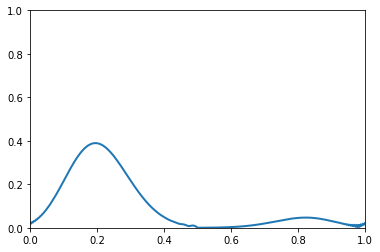

In [253]:
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(0,1))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 1, n)
    y=abs(basis@((evolution**(i))*coeffs))
    #y=abs(basisSparse@((evolutionSparse**(i))*coeffsSparse))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nframes, interval=20, blit=True);

#anim.save('/mnt/c/Users/david/share/lectures/tp2/simulations/sims/tunnel.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

#import time;
#time1 = time.time();
output=anim.to_jshtml();
#time2 = time.time()
#print('{:.3f} s'.format((time2-time1)))

HTML(output)

# Unused attempt to improve performance by keeping only relevant energy eigenstates. Does not, however, improve things as much as hoped for

In [249]:
# not used. doesn't give the performance gains hoped for.
pattern=[(abs(x)>10**(-2)) for x in coeffs];
coeffsSparse = np.extract(pattern,coeffs)
evolutionSparse = np.extract(pattern,evolution)
basisSparse = np.compress(pattern,basis,axis=1)